In [14]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('opinionesSentimientos.csv')

In [16]:
target = 'score'

In [17]:
vectorizer = CountVectorizer(
    max_features=10000,
    stop_words='english',
    min_df=5,
    max_df=0.7
)

In [18]:
X_bow=vectorizer.fit_transform(df["text_clean"])

In [19]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['100', '12', '13', '15', '30', '94', 'ability', 'able', 'access',
       'account', 'action', 'active', 'activities', 'activity',
       'actually', 'add', 'adding', 'allow', 'amazing', 'annoying', 'app',
       'apple', 'application', 'apps', 'asap', 'audio', 'auto',
       'automated', 'available', 'awesome', 'bad', 'ban', 'banned',
       'believe', 'best', 'better', 'big', 'black', 'block', 'blocked',
       'bring', 'bug', 'bugs', 'business', 'businesses', 'button',
       'calls', 'case', 'catalog', 'cause', 'change', 'changed',
       'channels', 'chat', 'chats', 'check', 'click', 'clients', 'close',
       'code', 'color', 'come', 'communication', 'community', 'company',
       'confused', 'connect', 'connecting', 'consider', 'contact',
       'contacts', 'continuously', 'control', 'cool', 'crashes',
       'crashing', 'create', 'current', 'customer', 'customers', 'daily',
       'data', 'day', 'days', 'dear', 'delete', 'deleted', 'device',
       'devices', 'didnt', 'di

In [20]:
df_counts = pd.DataFrame(X_bow.toarray(), columns=feature_names)
df_counts.head()

,100,12,13,15,30,94,ability,able,access,account,...,work,working,works,world,writing,wrong,wtf,years,yes,yesterday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df_counts, df[target], test_size=0.2, random_state=42
)

In [22]:
X_train.to_csv('gradient_X_train.csv')
X_test.to_csv('gradient_X_test.csv')
y_train.to_csv('gradient_y_train.csv')
y_test.to_csv('gradient_y_test.csv')

In [23]:
gradient = SGDRegressor()

In [24]:
gradient_param_grid = {
    'loss': ['squared_error'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'l1_ratio': [0.15, 0.5, 0.75],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000],
    'tol': [1e-3, 1e-4],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.01, 0.1]
}

In [25]:
gradient_search = GridSearchCV(
    gradient
    , gradient_param_grid
    , cv=4
    , error_score=-1000
    , n_jobs=-1
    , scoring="r2"
    , verbose=5
    )

In [26]:
gradient_search.fit(X_train, y_train)

Fitting 4 folds for each of 1296 candidates, totalling 5184 fits


,estimator,SGDRegressor()
,param_grid,"{'alpha': [0.0001, 0.001, ...], 'eta0': [0.01, 0.1], 'fit_intercept': [True, False], 'l1_ratio': [0.15, 0.5, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,4
,verbose,5
,pre_dispatch,'2*n_jobs'
,error_score,-1000
,return_train_score,False
,loss,'squared_error'


In [27]:
gradient_df_results = pd.DataFrame(gradient_search.cv_results_)

<Axes: xlabel='std_test_score', ylabel='mean_test_score'>

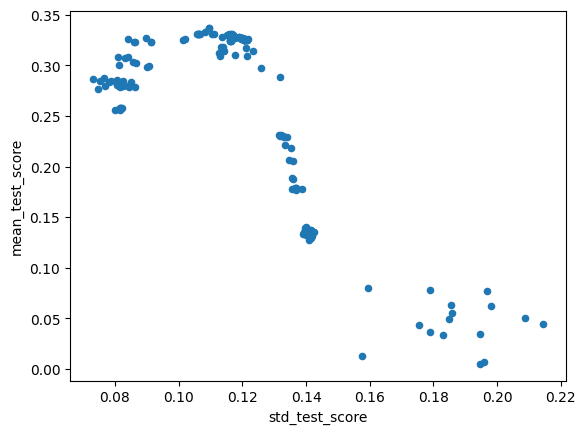

In [28]:
gradient_df_results_positive = gradient_df_results[gradient_df_results['mean_test_score'] > 0]
gradient_df_results_positive.plot(
    kind='scatter', x='std_test_score', y='mean_test_score'
    )

In [29]:
gradient_df_results[['mean_test_score', 'std_test_score']].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score
893,3.371592e-01,1.096775e-01
899,3.368614e-01,1.093830e-01
868,3.325079e-01,1.083136e-01
869,3.313502e-01,1.111134e-01
966,3.312450e-01,1.065348e-01
...,...,...
128,-2.681244e+25,2.238099e+25
124,-2.703658e+25,3.429380e+25
129,-2.862651e+25,2.594221e+25
408,-3.202636e+25,2.802237e+25


In [30]:
gradient_df_results.to_csv('gradientianRidge_grisearch_results.csv')

In [31]:
pd.to_pickle(gradient_search.best_estimator_, 'gradient.pk')

In [32]:
import pandas as pd
from sklearn.metrics import r2_score

In [33]:
model = pd.read_pickle('gradient.pk')

In [34]:
X_test = pd.read_csv('gradient_X_test.csv', index_col='Unnamed: 0')
y_test = pd.read_csv('gradient_y_test.csv', index_col='Unnamed: 0')

In [35]:
y_true = y_test
y_pred = model.predict(X_test)
r2_score(y_true, y_pred)

0.34002729951486754

In [36]:
df_test_results = pd.DataFrame({
    'y_true': y_true.reset_index(drop=True)['score']
    , 'y_pred': pd.Series(y_pred)
    })

<Axes: >

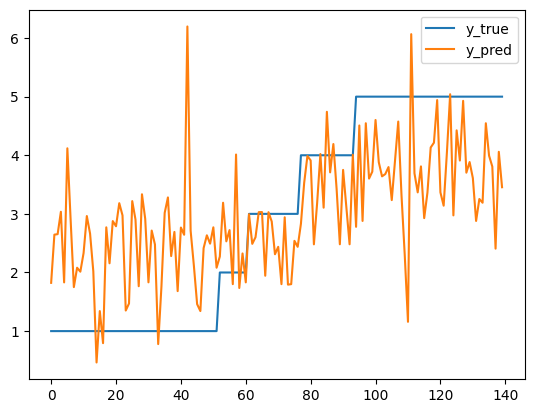

In [37]:
df_test_results.sort_values('y_true').reset_index(drop=True).plot()